In [82]:
#from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

#from tensorflow.keras import datasets, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras.utils import plot_model


import tensorflow as tf
#import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
import pdb
import seaborn as sns

In [74]:
class LeNet(Sequential):
  def __init__(self, input_shape, nb_classes):
    super().__init__()
    self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape= input_shape, padding='same'))
    self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1),activation='tanh', padding='valid'))
    self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    self.add(Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
    self.add(Flatten())
    self.add(Dense(84, activation='tanh'))
    self.add(Dense(nb_classes, activation='softmax'))

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate = 1e-2,
        decay_steps = 10000,
        decay_rate = 0.98
    )

    adam = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    #sgd = tf.keras.optimizers.SGD(learning_rate = lr_schedule, momentum = 0.9, nesterov = True)
    self.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [75]:
class CallData:
  def CallMnist():
    (train_x, train_y), (test_x, test_y) = mnist.load_data()
    train_X3D = train_x[:, :, :, np.newaxis] / 255
    test_X3D  = test_x[:, :, :, np.newaxis] / 255
    num_classes = np.max(test_y) + 1
    train_y = to_categorical(train_y, num_classes)
    test_y = to_categorical(test_y, num_classes)
    test_X3D = np.array(test_X3D)
    train_X3D = np.array(train_X3D)
    N = len(train_y)
    train_X3D = np.array(train_X3D)
    idx = random.sample(range(N), round(N*0.2))
    val_x = train_X3D[idx,:,:,:]
    val_y = train_y[idx]
    train_x = train_X3D[[i for i in range(N) if i not in idx],:,:]
    train_y = train_y[[i for i in range(N) if i not in idx]]
    return (num_classes,train_x, train_y, val_x, val_y, test_X3D, test_y)

In [79]:
class Model:
  def run(self, epochs = 2, batch_size = 512):
    (num_classes,train_x, train_y, val_x, val_y, test_X3D, test_y) = CallData.CallMnist()
    model = LeNet(input_shape = train_x.shape[1:], nb_classes = num_classes)
    model.summary(expand_nested=True)
    history = model.fit(train_x, train_y,epochs=epochs,batch_size=512, validation_data=(val_x, val_y), verbose=1)

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    #plt.savefig('training results.pdf')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    #plt.savefig('training loss.pdf')
    plt.show()

    self.model = model

  def eval(self):
    (num_classes,train_x, train_y, val_x, val_y, test_X3D, test_y) = CallData.CallMnist()
    model = self.model
    predict = model.predict(test_X3D)
    fig = plt.figure(figsize=(15, 7))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    #pick 50 images randomly
    N   = 50
    idx = random.sample(range(test_y.shape[0]), N)

    for i in range(N):
      ii = idx[i]
      ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
      ax.imshow(test_X3D[ii, : , : , 0].reshape((28,28)), cmap = plt.cm.gray_r, interpolation='nearest')
      predclass = np.argmax(predict[ii,:])
      trueclass = np.argmax(test_y[ii,:])

      S = str(predclass)

      if predclass == trueclass:
        P = str(round(predict[ii, predclass], 2))
        ax.text(0, 3, S + ', P = ' + P, color='green', fontsize=15)
      else:
        ax.text(0, 3, S + ', T = ' + str(trueclass), color='red')

    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "le_net_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_24                 │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_25                 │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 295ms/step - accuracy: 0.7935 - loss: 0.6312 - val_accuracy: 0.9545 - val_loss: 0.1523
Epoch 2/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 310ms/step - accuracy: 0.9606 - loss: 0.1281 - val_accuracy: 0.9693 - val_loss: 0.1065


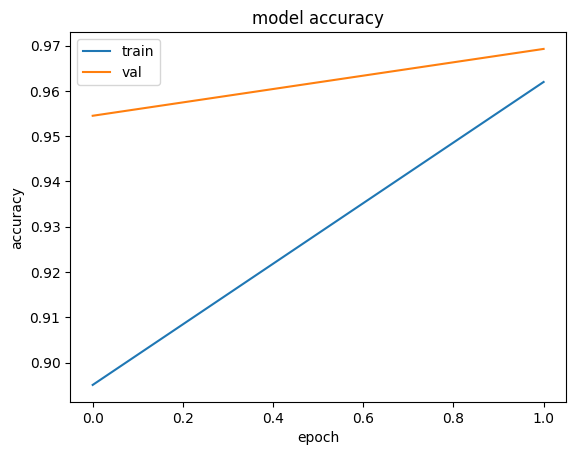

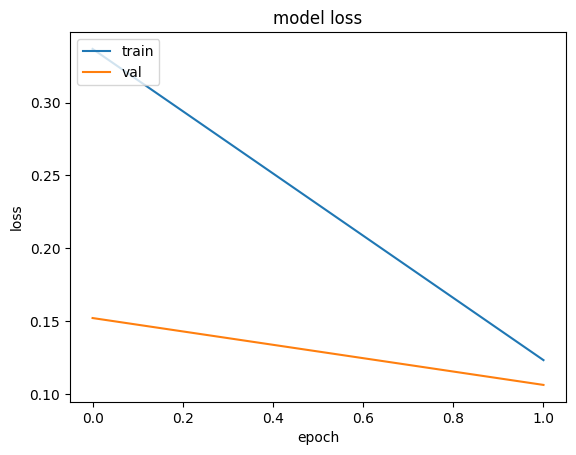

In [80]:
M = Model()
M.run()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


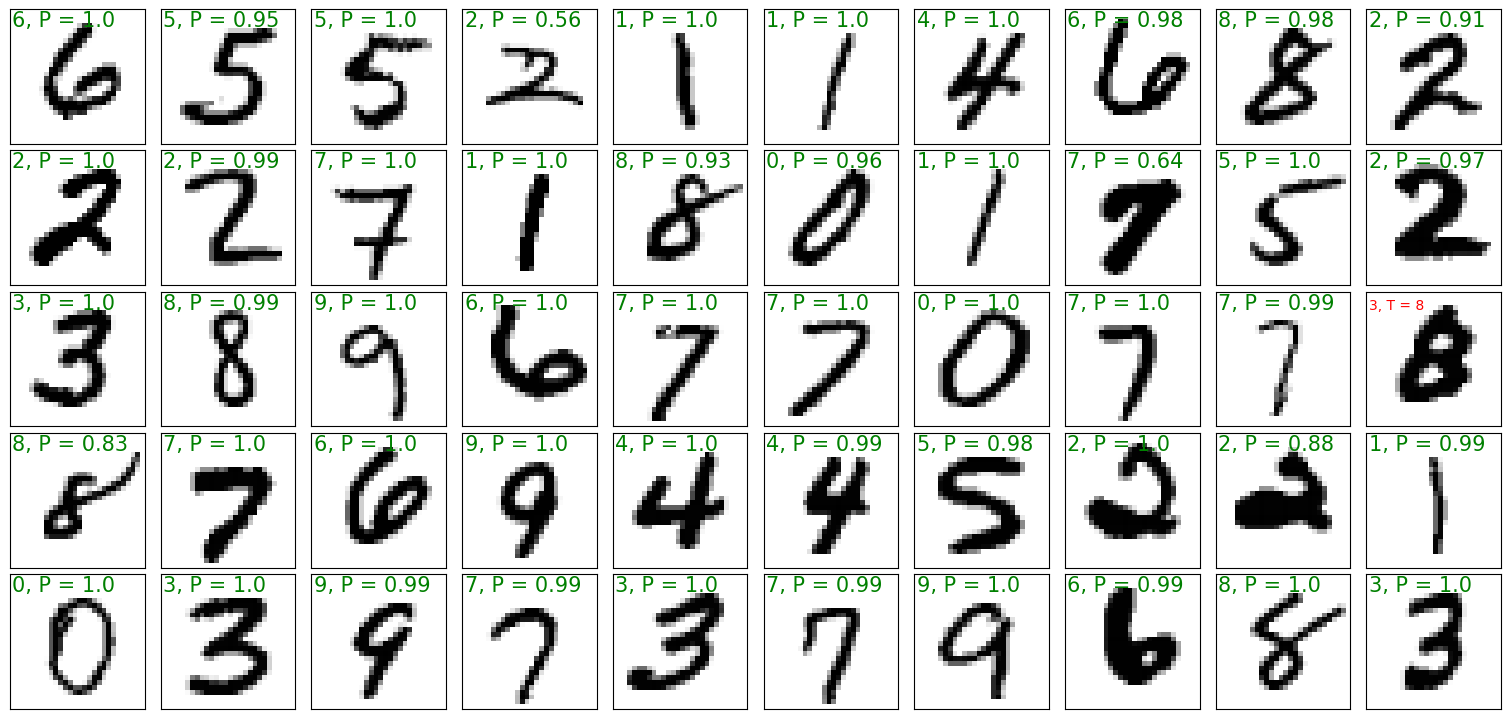

In [78]:
M.eval()